In [1]:
import jieba
import jieba.posseg as pseg
from sklearn.feature_extraction.text import TfidfVectorizer
from textrank4zh import TextRank4Keyword
 
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
# 获取停用词
def load_stopwords(stopwords_file):
    stopwords = set()
    with open(stopwords_file, 'r', encoding='utf-8') as f:
        for line in f:
            stopwords.add(line.strip())
    return stopwords



# 加载文档集，对文档集过滤词性和停用词

# def filter_documents(data_path, stopwords):
#     documents = []
#     with open(data_path, 'r', encoding='utf-8') as f:
#         for line in f:
#             document = []
#             words = pseg.cut(line.strip())
#             for word, flag in words:
#                 if flag.startswith('n') and word not in stopwords and len(word) > 1:
#                     document.append(word)
#             documents.append(document)
#     return documents

def filter_documents(data_path, stopwords):
    documents = []
    with open(data_path, 'r', encoding='utf-8') as f:
        document = [] # 更改
        for line in f:
            # document = []
            words = pseg.cut(line.strip())
            for word, flag in words:
                if flag.startswith('n') and word not in stopwords and len(word) > 1:
                    document.append(word)
            # print(document)
            # documents.append(document)
            # print(documents)
        documents.append(document)
    return documents


# 使用TextRank提取关键词
def extract_keywords_textrank(documents, top_n=10):
    top_keywords_per_document = []
    tr4w = TextRank4Keyword()
    for document in documents:
        text = ' '.join(document)
        tr4w.analyze(text=text, lower=True, window=2)
        keywords = tr4w.get_keywords(top_n, word_min_len=2)
        top_keywords_per_document.append([keyword.word for keyword in keywords])
    return top_keywords_per_document

def generate_wordcloud(keywords, title):
    """
    生成词云图并显示
    参数:
    keywords (list): 包含关键词的列表。
    title (str): 词云图的标题。
    返回:
    None
    """
    # 将关键词列表转化为字符串
    keywords_str = ' '.join(keywords)
 
    # 指定中文字体文件路径（根据实际情况替换为合适的路径）
    font_path = r'C:\Windows\Fonts\msyhl.ttc'  # 替换为包含中文字符的字体文件路径
 
    # 创建词云对象并指定字体
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(keywords_str)
 
    # 显示词云图
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'wordcloud - {title}')
    plt.show()

In [31]:
len(documents[0])
documents[0]

['C++',
 '程序设计',
 '课程名称',
 'C++',
 '程序设计',
 'C++',
 '课程',
 '性质',
 '通识',
 '课程',
 '学分',
 '学分',
 '教师',
 '佟强',
 '院系',
 '信息',
 '学院',
 '电子商务',
 '电话',
 '教学',
 '对象',
 '全校',
 '本科生',
 '方式',
 '作业',
 '期末考试',
 '上机',
 '学术',
 '诚信',
 '课程',
 '学生',
 '学术',
 '诚信',
 '对外经济贸易大学',
 '学生',
 '条例',
 '经济',
 '贸易大学',
 '学生',
 '实施细则',
 '对外经济贸易大学',
 '考场',
 '纪律',
 '教学方式',
 '机房',
 '学生',
 '编程',
 '老师',
 '例子',
 '作业',
 '作业',
 '编程',
 '练习题',
 '对外经济贸易大学',
 '本科生',
 '课堂',
 '规范',
 '学生',
 '电子设备',
 '专心',
 '编程',
 '课堂',
 '讲授',
 '内容',
 '布置',
 '学生',
 '缺勤',
 '教师',
 '情况',
 '学生',
 '参加考试',
 '课程',
 '课程',
 '面向',
 '全校',
 '本科生',
 '专业',
 '基础',
 '课程',
 '学生',
 '计算机',
 '编程',
 '能力',
 '学生',
 '编程语言',
 '编程技术',
 '算法',
 '程序设计',
 '思想',
 '方法',
 '语言',
 '程序设计',
 '上机',
 '学生',
 '课堂',
 '所学',
 '调试程序',
 '技巧',
 '编写程序',
 '方法',
 '课程',
 '金融',
 '工程',
 '金融学',
 '统计学',
 '专业',
 '先导',
 '课程',
 '课程',
 '内容',
 '程序设计',
 '基础知识',
 'C++',
 '语言',
 '基础',
 '数据类型',
 '顺序',
 '结构',
 '程序设计',
 '数组',
 '函数',
 '指针',
 '对象',
 '多态',
 '模板',
 '操作符',
 '文件',
 '教学',
 '目标',
 '课程',
 '教学',
 '目标',
 '学生',

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\19396\AppData\Local\Temp\jieba.cache
Loading model cost 0.589 seconds.
Prefix dict has been built successfully.


停用词表的大小为： 1395
文档的数量为 1
文档 1 的前10个关键词: 函数, 学生, c++, 内容, 课程, 数组, 方法, 教学, 对象, 程序设计


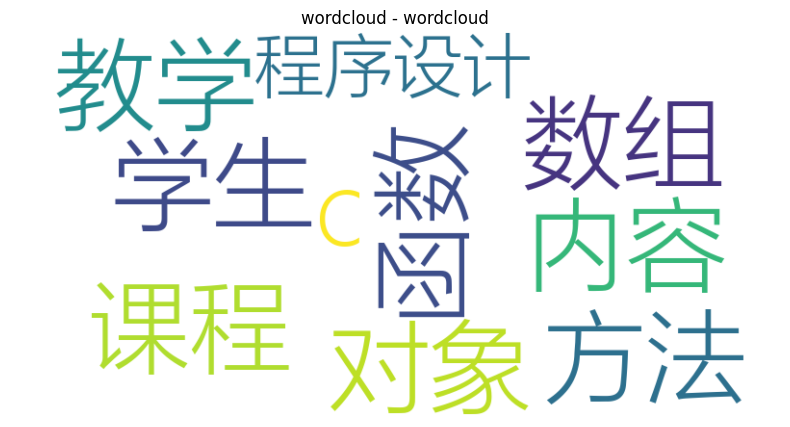

In [3]:

if __name__ == "__main__":
    stopwords_file = r'stop_words\baidu_stopwords.txt'  # 停用词文件路径
    # data_path = r'corpus4keyword.txt'  # 文档集文件路径
    data_path = r'CPP教学大纲.txt'  # 文档集文件路径
 
    stopwords = load_stopwords(stopwords_file)
    documents = filter_documents(data_path, stopwords)
 
    print('停用词表的大小为：', len(stopwords))
    print('文档的数量为', len(documents))
 
   
 
    top_keywords1 = extract_keywords_textrank(documents)
 
    # 打印每个文档的前10个关键词
    for doc_id, keywords in enumerate(top_keywords1):
        print(f'文档 {doc_id + 1} 的前10个关键词: {", ".join(keywords)}')
        break
 
    document_keywords = top_keywords1[0]  # 假设第20个文档的索引是19
    generate_wordcloud(document_keywords, 'wordcloud')